In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('data/clean/weather.csv')
covid = pd.read_csv('data/clean/covid.csv')
taxi_facts = pd.read_csv('data/clean/df_taxi_facts.csv')
taxi_zone_lookup = pd.read_csv('data/clean/taxi_zone_lookup_enhanced.csv')
calendar = pd.read_csv('data/clean/calendar.csv')

## combine data as cube like object

multi_index: [year, month, day] # dimension 1
multi_column_index: [Borough, locationID] # dimension 2
value for each cube: [pickups, dropoffs, trip_distance]

In [222]:
feature = 'dropoffs'
cube1 = taxi_facts.copy()
#cube1 = cube1.merge(calendar[['dateID', 'year', 'month', 'day']]) # .set_index(['year', 'month', 'day', 'locationID']).sort_values(by=['dateID', 'taxiTypeID', 'locationID'])

In [223]:
cube1

Unnamed: 0  dateID  locationID  pickups  dropoffs  trip_distance  \
0                0  737791          74      121        50       5.177274   
1                1  737791          75       76        31       5.177274   
2                2  737791          41       66        38       5.177274   
3                3  737791          42       59        51       5.177274   
4                4  737791          95       41        12       5.177274   
...            ...     ...         ...      ...       ...            ...   
569930      569930  738155          52        0         2       6.449878   
569931      569931  738155         190        0         2       6.449878   
569932      569932  738155          96        0         1       6.449878   
569933      569933  738155         253        0         1       6.449878   
569934      569934  738155          12        0         1       6.449878   

       taxiTypeID    WID  CID  
0           green  34122  307  
1           green  34122  307  
2           green  34122  307  
3           green  34122  307  
4           green  34122  307  
...           ...    ...  ...  
569930        fhv  35873  671  
569931        fhv  35873  671  
569932        fhv  35873  671  
569933        fhv  35873  671  
569934        fhv  35873  671  

[569935 rows x 9 columns]

In [224]:
t1 = cube1[['dateID', 'WID', 'CID', 'locationID', 'pickups', 'dropoffs']].groupby(['dateID', 'WID', 'CID', 'locationID']).sum().sort_values(by=['dateID', 'locationID'])
t2 = cube1[['dateID', 'WID', 'CID', 'locationID', 'trip_distance']].groupby(['dateID', 'WID', 'CID', 'locationID']).mean().sort_values(by=['dateID', 'locationID'])
cube1 = pd.concat([t1, t2], axis=1)
cube1


pickups  dropoffs  trip_distance
dateID WID   CID locationID                                  
737484 33498 0   1                35       334       6.752974
                 2                 0         2       4.452069
                 3                28        28       6.752974
                 4               730      1285       6.752974
                 5                17        15       4.452069
...                              ...       ...            ...
738275 21308 791 261             818       705      36.161326
                 262            1523      1822      36.161326
                 263            3071      2903      36.161326
                 264            1225       864      50.996540
                 265             152       375      50.996540

[204703 rows x 3 columns]

In [225]:
cube2 = cube1[feature].unstack(level=-1)

In [226]:
cube2

locationID          1    2      3       4     5     6       7    8     9    \
dateID WID   CID                                                             
737484 33498 0    334.0  2.0   28.0  1285.0  15.0   7.0  1564.0  4.0  45.0   
737485 33499 1    469.0  1.0   35.0  1033.0   8.0  33.0  1339.0  6.0  36.0   
737486 33500 2    372.0  NaN   68.0   649.0  18.0  65.0  1121.0  5.0  69.0   
737487 33501 3    386.0  NaN   66.0   807.0  16.0  80.0  1211.0  7.0  65.0   
737488 33502 4    440.0  0.0  100.0   830.0  13.0  77.0  1198.0  6.0  64.0   
...                 ...  ...    ...     ...   ...   ...     ...  ...   ...   
738271 21304 787  274.0  NaN   18.0   444.0  20.0  47.0   463.0  2.0  48.0   
738272 21305 788  319.0  1.0   35.0   441.0  23.0  59.0   494.0  3.0  39.0   
738273 21306 789  501.0  NaN   40.0   449.0  14.0  53.0   545.0  2.0  57.0   
738274 21307 790  437.0  0.0   27.0   582.0  22.0  53.0   630.0  4.0  47.0   
738275 21308 791  371.0  0.0   18.0   717.0   6.0  16.0   690.0  6.0  27.0   

locationID          10   ...    256    257    258    259    260     261  \
dateID WID   CID         ...                                              
737484 33498 0    238.0  ...  770.0  151.0   83.0   81.0  537.0  1015.0   
737485 33499 1    244.0  ...  662.0  117.0   84.0   82.0  437.0   899.0   
737486 33500 2    265.0  ...  457.0  113.0  132.0  124.0  421.0   937.0   
737487 33501 3    258.0  ...  491.0  155.0  108.0  142.0  428.0  1028.0   
737488 33502 4    266.0  ...  528.0  165.0  129.0  126.0  401.0   999.0   
...                 ...  ...    ...    ...    ...    ...    ...     ...   
738271 21304 787  104.0  ...  244.0   47.0   54.0   35.0  151.0   524.0   
738272 21305 788  113.0  ...  264.0   74.0   62.0   41.0  167.0   587.0   
738273 21306 789  104.0  ...  275.0   74.0   58.0   47.0  151.0   676.0   
738274 21307 790  133.0  ...  298.0   64.0   71.0   38.0  155.0   627.0   
738275 21308 791  119.0  ...  517.0   57.0   50.0   23.0  151.0   705.0   

locationID           262     263     264    265  
dateID WID   CID                                 
737484 33498 0    3334.0  5300.0  1473.0  503.0  
737485 33499 1    2654.0  4064.0  1343.0  562.0  
737486 33500 2    2904.0  3785.0  1084.0  474.0  
737487 33501 3    3411.0  4331.0  1188.0  502.0  
737488 33502 4    3404.0  4373.0  1312.0  485.0  
...                  ...     ...     ...    ...  
738271 21304 787  2073.0  2509.0   785.0  425.0  
738272 21305 788  2087.0  2592.0   705.0  405.0  
738273 21306 789  2126.0  2698.0   978.0  465.0  
738274 21307 790  2045.0  2726.0   846.0  446.0  
738275 21308 791  1822.0  2903.0   864.0  375.0  

[792 rows x 264 columns]

In [208]:
cube2 = cube2.reset_index()

In [209]:
cube2.columns

Index(['dateID',    'WID',    'CID',        1,        2,        3,        4,
              5,        6,        7,
       ...
            256,      257,      258,      259,      260,      261,      262,
            263,      264,      265],
      dtype='object', name='locationID', length=267)

In [210]:
calendar[['dateID', 'year', 'month', 'day']]

dateID  year  month  day
0     736695  2018      1    1
1     736696  2018      1    2
2     736697  2018      1    3
3     736698  2018      1    4
4     736699  2018      1    5
...      ...   ...    ...  ...
1821  738516  2022     12   27
1822  738517  2022     12   28
1823  738518  2022     12   29
1824  738519  2022     12   30
1825  738520  2022     12   31

[1826 rows x 4 columns]

In [211]:
cube2 = cube2.merge(calendar[['dateID', 'year', 'month', 'day']], how='left', on='dateID')


In [212]:
cube2 = cube2.set_index(['year', 'month', 'day'])

In [213]:
tcube = cube2.copy()

In [214]:
taxi_zone_lookup[['LocationID', 'Borough']]

LocationID        Borough
0             1            EWR
1             2         Queens
2             3          Bronx
3             4      Manhattan
4             5  Staten Island
..          ...            ...
251         259          Bronx
252         260         Queens
253         261      Manhattan
254         262      Manhattan
255         263      Manhattan

[256 rows x 2 columns]

In [215]:
t_cube = tcube.drop(columns=['dateID', 'WID', 'CID', 265, 264])
location_id_map = taxi_zone_lookup[['LocationID', 'Borough']].set_index('LocationID').to_dict()['Borough']
mc1 = [x for x in t_cube.columns]
mc2 = [location_id_map[x] if x in location_id_map else 'undefined' for x in mc1]
multi_columns = [mc2, mc1]

In [216]:
t_cube.columns = multi_columns

In [217]:
cube_pickups = t_cube.reindex(sorted(t_cube.columns), axis=1)

In [218]:
# cube1[feature].unstack(level=4)
# cube1.melt(id_vars=['year', 'month', 'day', 'locationID'], value_vars=['pickups'])
cube1.pivot(index='dateID', columns='locationID', values=feature)

KeyError: 'dateID'

In [219]:
def get_value_counts_as_columns(df, feature):
    ret_df = pd.DataFrame()
    sub_df = df
    sub_df = sub_df[sub_df[feature].notna()]
    sub_df = sub_df.reset_index()
    sub_df['temp'] = feature + '_'
    sub_df['index'] = sub_df['index'].astype('str')
    sub_df['index'] = sub_df['temp'] + sub_df['index']
    sub_df = sub_df.drop(columns=['temp'])
    # sub_df['index'] = sub_df['index'].apply(lambda x: f'{feature}_{int(x)}')
    sub_df = sub_df.swapaxes(0, 1)
    sub_df.columns = list(sub_df.iloc[0])
    sub_df = sub_df.drop('index')
    ret_df = pd.concat([ret_df, sub_df], axis=0)
    return ret_df

SyntaxError: unterminated string literal (detected at line 1) (3684255329.py, line 1)

In [ ]:
'pd.DataFrame(columns=['a', 'b'], index=[1, 2], data=[[[7, 3], [7, 3]],[[7, 3], [7, 3]]])


## Auswertung

In [220]:
cube_pickups.groupby(axis=1, level=0).sum()

Bronx  Brooklyn    EWR  Manhattan   Queens  Staten Island  \
year month day                                                               
2020 2     29   3180.0   15061.0  334.0   213528.0  16959.0          865.0   
     3     1    2584.0   13479.0  469.0   160978.0  17232.0         1342.0   
           2    4552.0   14233.0  372.0   179829.0  17990.0         1874.0   
           3    4686.0   15603.0  386.0   209328.0  17956.0         1858.0   
           4    4891.0   16220.0  440.0   214966.0  18883.0         1832.0   
...                ...       ...    ...        ...      ...            ...   
2022 4     26   1650.0    7663.0  274.0   112162.0   8888.0         1262.0   
           27   1896.0    8255.0  319.0   119155.0   9992.0         1314.0   
           28   1880.0    8283.0  501.0   119165.0  10812.0         1206.0   
           29   1798.0    8117.0  437.0   118800.0  11026.0         1238.0   
           30   1249.0    7927.0  371.0   116483.0   8600.0          715.0   

                undefined  
year month day             
2020 2     29       554.0  
     3     1        489.0  
           2        540.0  
           3        567.0  
           4        630.0  
...                   ...  
2022 4     26       201.0  
           27       190.0  
           28       212.0  
           29       203.0  
           30       199.0  

[792 rows x 7 columns]

In [221]:
cube_pickups.groupby(axis=0, level=0).sum().groupby(axis=1, level=0).sum()

Bronx   Brooklyn      EWR   Manhattan     Queens  Staten Island  \
year                                                                       
2020  603355.0  1210891.0  15114.0  11261411.0  1323353.0       301312.0   
2021  699664.0  1996043.0  65448.0  28341978.0  2470769.0       334528.0   
2022  192194.0   801816.0  31380.0  11743677.0   984506.0        95666.0   

      undefined  
year             
2020    64789.0  
2021    96506.0  
2022    20223.0

In [1]:
from analysis import gen_cube
import pandas as pd
taxi_facts = pd.read_csv('data/clean/df_taxi_facts.csv')
covid = pd.read_csv('data/clean/covid.csv')

cov_facts = taxi_facts.merge(covid[['CID', 'case_count']])
c_pickup = gen_cube(taxi_facts, 'pickups', 'sum')
c_dropoffs = gen_cube(taxi_facts, 'dropoffs', 'sum')
c_distances = gen_cube(taxi_facts, 'trip_distance', 'mean')
c_cov_cases = gen_cube(cov_facts, 'case_count', 'sum')

In [29]:
c_pickup

Bronx                                                       \
                 3     20    31    32   46     47     51   58   59    60    
year month day                                                              
2020 2     29   28.0  17.0   9.0  30.0  6.0   70.0  105.0  4.0  2.0  30.0   
     3     1    29.0  17.0  11.0  34.0  2.0   44.0  112.0  2.0  1.0  35.0   
           2    51.0  73.0  13.0  67.0  6.0   91.0  149.0  5.0  2.0  48.0   
           3    62.0  75.0   7.0  70.0  7.0  112.0  169.0  7.0  5.0  58.0   
           4    66.0  68.0   7.0  85.0  6.0  116.0  172.0  7.0  4.0  57.0   
...              ...   ...   ...   ...  ...    ...    ...  ...  ...   ...   
2022 4     26   16.0  20.0   7.0  18.0  0.0   27.0   33.0  1.0  3.0  23.0   
           27   20.0  25.0   7.0  24.0  2.0   38.0   56.0  2.0  1.0  11.0   
           28   23.0  21.0   7.0  25.0  2.0   38.0   53.0  0.0  2.0  21.0   
           29   17.0  20.0   2.0  24.0  5.0   42.0   50.0  1.0  3.0  18.0   
           30    7.0  13.0   8.0  14.0  2.0   15.0   18.0  1.0  0.0  12.0   

                ... Staten Island              undefined                    \
                ...           221    245   251       18    81    102   205   
year month day  ...                                                          
2020 2     29   ...         145.0   45.0  18.0      33.0  26.0  15.0  33.0   
     3     1    ...         409.0   70.0  20.0      28.0  26.0  12.0  40.0   
           2    ...         505.0   96.0  43.0      34.0  35.0  23.0  66.0   
           3    ...         517.0   78.0  37.0      58.0  21.0  15.0  73.0   
           4    ...         478.0   85.0  42.0      45.0  38.0  18.0  67.0   
...             ...           ...    ...   ...       ...   ...   ...   ...   
2022 4     26   ...         146.0  111.0  57.0      10.0   4.0   0.0   7.0   
           27   ...         152.0   80.0  80.0       3.0   2.0   3.0   7.0   
           28   ...         144.0   77.0  57.0       3.0   6.0   2.0   9.0   
           29   ...         158.0   87.0  59.0       4.0   5.0   3.0   3.0   
           30   ...         105.0   49.0  29.0      11.0   2.0   1.0   2.0   

                                  
                 208   213   220  
year month day                    
2020 2     29   22.0  55.0  32.0  
     3     1    17.0  59.0  21.0  
           2    34.0  76.0  28.0  
           3    32.0  73.0  31.0  
           4    33.0  88.0  33.0  
...              ...   ...   ...  
2022 4     26    1.0   5.0   3.0  
           27    4.0   8.0   3.0  
           28    8.0   4.0   3.0  
           29    4.0   9.0   6.0  
           30    3.0   7.0   6.0  

[792 rows x 262 columns]

In [30]:
c_dropoffs

Bronx                                                          \
                  3      20    31    32    46     47     51    58   59    60    
year month day                                                                  
2020 2     29    28.0   57.0  20.0  47.0   9.0   98.0  140.0   7.0  4.0  57.0   
     3     1     35.0   37.0  13.0  39.0   4.0   65.0  135.0   6.0  4.0  53.0   
           2     68.0   92.0  19.0  91.0   9.0  125.0  186.0  10.0  6.0  74.0   
           3     66.0  100.0  18.0  86.0  11.0  124.0  183.0  13.0  9.0  72.0   
           4    100.0   85.0  28.0  96.0   9.0  146.0  176.0  10.0  8.0  66.0   
...               ...    ...   ...   ...   ...    ...    ...   ...  ...   ...   
2022 4     26    18.0   24.0  10.0  28.0   4.0   49.0   66.0   2.0  1.0  30.0   
           27    35.0   42.0  10.0  32.0   4.0   48.0   75.0   3.0  1.0  29.0   
           28    40.0   23.0  13.0  37.0   5.0   44.0   77.0   2.0  2.0  33.0   
           29    27.0   35.0  10.0  37.0   4.0   50.0   72.0   5.0  1.0  36.0   
           30    18.0   34.0  41.0  24.0   9.0   28.0   39.0   6.0  3.0  20.0   

                ... Staten Island              undefined                     \
                ...           221    245   251       18    81    102    205   
year month day  ...                                                           
2020 2     29   ...         240.0   80.0  44.0      72.0  32.0  65.0   93.0   
     3     1    ...         259.0   72.0  25.0      63.0  31.0  60.0   86.0   
           2    ...         281.0  117.0  49.0      62.0  38.0  53.0  102.0   
           3    ...         310.0  102.0  61.0      72.0  41.0  51.0  113.0   
           4    ...         289.0  117.0  57.0      79.0  52.0  64.0  137.0   
...             ...           ...    ...   ...       ...   ...   ...    ...   
2022 4     26   ...         130.0  101.0  59.0      24.0   7.0  28.0   46.0   
           27   ...         126.0   93.0  80.0      25.0   7.0  22.0   34.0   
           28   ...         106.0   85.0  71.0      33.0  13.0  20.0   40.0   
           29   ...         130.0  101.0  67.0      31.0  14.0  29.0   34.0   
           30   ...          89.0   40.0  33.0      23.0   7.0  24.0   28.0   

                                    
                 208    213    220  
year month day                      
2020 2     29   48.0   86.0  158.0  
     3     1    40.0   98.0  111.0  
           2    60.0  102.0  123.0  
           3    65.0   99.0  126.0  
           4    56.0  101.0  141.0  
...              ...    ...    ...  
2022 4     26   21.0   24.0   51.0  
           27   16.0   27.0   59.0  
           28   20.0   30.0   56.0  
           29   18.0   26.0   51.0  
           30   17.0   40.0   60.0  

[792 rows x 262 columns]

In [31]:
c_distances

Bronx                                              \
                      3          20         31         32         46    
year month day                                                          
2020 2     29    6.752974   6.752974   6.752974   6.752974   6.752974   
     3     1     4.437438   4.437438   4.437438   4.437438   4.437438   
           2     4.352602   4.352602   4.352602   4.352602   4.352602   
           3     5.152849   5.152849   5.152849   5.152849   5.152849   
           4     7.617369   7.617369   7.617369   7.617369   7.617369   
...                   ...        ...        ...        ...        ...   
2022 4     26   12.864473  12.864473   7.633822  12.864473   8.389263   
           27    5.382056  89.130133  89.130133   5.382056   5.382056   
           28   30.857413  30.857413  30.857413   7.266788   7.266788   
           29   64.088870  64.088870  64.088870  64.088870   8.019914   
           30    5.680668  36.161326  36.161326  36.161326  36.161326   

                                                                     ...  \
                      47         51        58        59         60   ...   
year month day                                                       ...   
2020 2     29    6.752974   6.752974  6.752974  4.452069   6.752974  ...   
     3     1     4.437438   4.437438  4.437438  4.437438   4.437438  ...   
           2     4.352602   4.352602  4.352602  4.352602   4.352602  ...   
           3     5.152849   5.152849  5.152849  5.749284   5.152849  ...   
           4     7.617369   7.617369  7.617369  7.617369   7.617369  ...   
...                   ...        ...       ...       ...        ...  ...   
2022 4     26   12.864473  12.864473  7.633822  6.878380  12.864473  ...   
           27   89.130133  89.130133  5.382056  6.901912  89.130133  ...   
           28   30.857413  30.857413  7.266788  7.009232  30.857413  ...   
           29   64.088870  64.088870  8.019914  6.716582  64.088870  ...   
           30   36.161326  36.161326  5.680668  5.680668  36.161326  ...   

               Staten Island                       undefined              \
                         221       245       251         18          81    
year month day                                                             
2020 2     29       6.752974  4.452069  4.452069    7.004084    7.004084   
     3     1        4.922083  6.464377  4.922083    3.423969    3.423969   
           2        4.824271  4.824271  4.824271    3.211679    3.211679   
           3        5.333331  5.333331  5.333331    4.375933    4.375933   
           4        4.708832  4.708832  7.617369    8.110295    8.110295   
...                      ...       ...       ...         ...         ...   
2022 4     26       7.633822  7.633822  7.633822   15.857519   15.857519   
           27       5.382056  5.382056  5.382056  130.244244  130.244244   
           28       7.266788  7.266788  7.266788   42.781504   42.781504   
           29      64.088870  6.716582  8.019914   92.775015   92.775015   
           30       5.680668  6.490900  5.680668   50.996540    4.870435   

                                                                            
                       102         205         208         213         220  
year month day                                                              
2020 2     29     7.004084    7.004084    7.004084    7.004084    7.004084  
     3     1      3.423969    3.423969    3.423969    3.423969    3.423969  
           2      3.211679    3.211679    3.211679    3.211679    3.211679  
           3      4.375933    4.375933    4.375933    4.375933    4.375933  
           4      8.110295    8.110295    8.110295    8.110295    8.110295  
...                    ...         ...         ...         ...         ...  
2022 4     26    15.857519   15.857519   15.857519    8.389263   15.857519  
           27   130.244244  130.244244  130.244244  130.244244  130.244244  
           28    42.

In [4]:
c_cov_cases

case_count
year month day            
2020 2     29          3.0
     3     1           0.0
           2           0.0
           3           3.0
           4          15.0
...                    ...
2022 4     26       8832.0
           27       5580.0
           28       8004.0
           29       8361.0
           30       3236.0

[792 rows x 1 columns]

In [ ]:
import plotly.express as px


In [11]:
# Plot
fig = px.line(c_cov_cases, x='case_count')

#fig.add_scatter(x=df['Date'], y=df['AAPL.Low']) # Not what is desired - need a line

# Show plot
fig.show()

TypeError: Argument 'y' is a pandas MultiIndex. pandas MultiIndex is not supported by plotly express at the moment.

In [ ]:
import matplotlib as plt
ax = c_cov_cases.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(12, 7), layout=(2, 3))
plt.tight_layout()

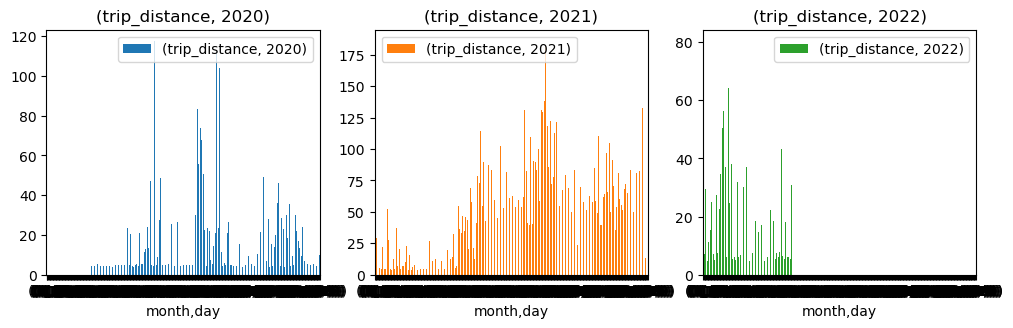

In [ ]:
df = c_distances.groupby(level=0, axis=1).sum()
ax = df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(12, 7), layout=(2, 3))
plt.tight_layout()

NameError: name 'plt' is not defined

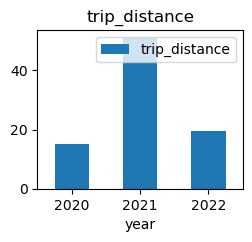

In [4]:
dfp = df.pivot_table(index='year', values=df.columns, aggfunc='mean')

dfp.plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3, 3))
plt.tight_layout()